In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np



In [2]:
(train_X,train_y),(test_X,test_y)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_X.shape,test_X.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
train_X=train_X/255
test_X=test_X/255

In [10]:
from  tensorflow.keras.utils import to_categorical

train_y=to_categorical(train_y)

In [11]:
train_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [24]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 32)                25120     
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_X,train_y,validation_split=0.2,batch_size=64,epochs=10)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.5471 - accuracy: 0.8335 - val_loss: 0.2254 - val_accuracy: 0.9323
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2551 - accuracy: 0.9244 - val_loss: 0.1684 - val_accuracy: 0.9505
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2019 - accuracy: 0.9407 - val_loss: 0.1478 - val_accuracy: 0.9571
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1722 - accuracy: 0.9490 - val_loss: 0.1371 - val_accuracy: 0.9582
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1484 - accuracy: 0.9563 - val_loss: 0.1265 - val_accuracy: 0.9628
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1338 - accuracy: 0.9603 - val_loss: 0.1231 - val_accuracy: 0.9638
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1208 - accuracy: 0.9649 - val_loss: 0.1230 - val_accuracy: 0.9651
Epoch 

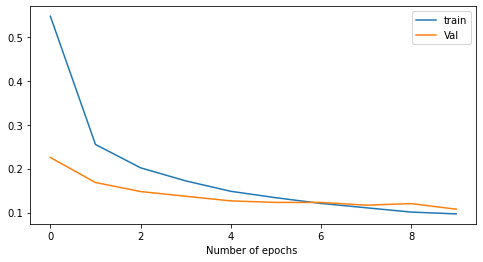

In [26]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='Val')
plt.xlabel('Number of epochs ')
plt.legend()
plt.show()

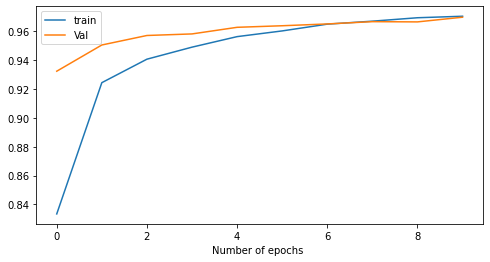

In [28]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='Val')
plt.xlabel('Number of epochs ')
plt.legend()
plt.show()